<h1> Project Introduction </h1>
<h2>📒# Blinkit Quick Commerce Analysis</h2>

This notebook contains the Python analysis part of the Blinkit Quick Commerce dataset.  
We will perform data understanding, exploratory data analysis (EDA), and extract insights for business decision-making.

**Steps covered:**

1. Importing libraries & dataset
2. Data understanding
3. Univariate analysis
4. Bivariate analysis
5. Insights summary


## Step 1: Import Libraries & Load Data

In [38]:
# Step 1: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set working directory
os.chdir(r"C:\Users\Siri\Desktop\Projects\Blinkit-Quick-Commerce-Analysis\Excel")

# Load dataset
df = pd.read_excel("blinkit_data_cleaned_final.xlsx")

# Preview
df.head()


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Item Outlet Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## 🔍 Step 2: Data Understanding
We start by checking dataset shape, column details, missing values, duplicates, and summary statistics.


In [32]:
print("Dataset Info:\n")
df.info()

print("\nShape of dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nUnique values per column:\n", df.nunique())
df.describe()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Item Outlet Sales          8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

Shape of dataset: (8523, 12)


,Outlet Establishment Year,Item Visibility,Item Weight,Item Outlet Sales,Rating
count,8523.000000,8523.000000,8523.00000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.81342,140.992783,3.965857
std,3.189396,0.051598,4.22724,62.275067,0.605651
min,2011.000000,0.000000,4.55500,31.290000,1.000000
25%,2014.000000,0.026989,9.31000,93.826500,4.000000
50%,2016.000000,0.053931,12.60000,143.012800,4.000000
75%,2018.000000,0.094585,16.00000,185.643700,4.200000
max,2022.000000,0.328391,21.35000,266.888400,5.000000


## 📊 Step 3: Univariate Analysis
We analyze the distribution of numerical columns (histograms & boxplots) and frequency of categorical columns (countplots).


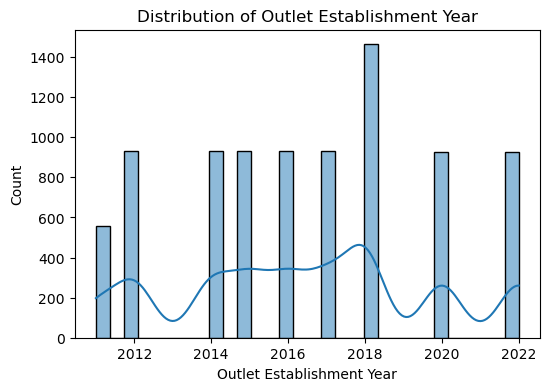

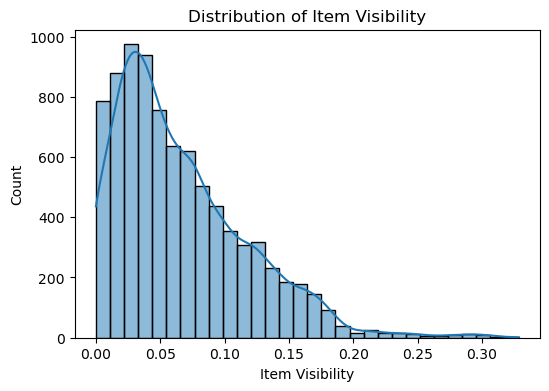

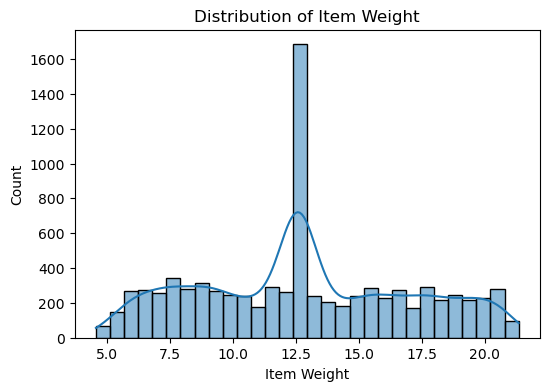

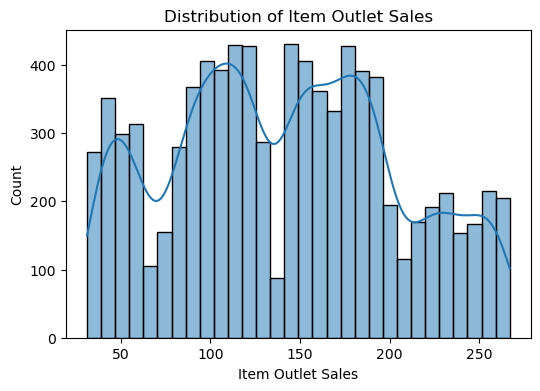

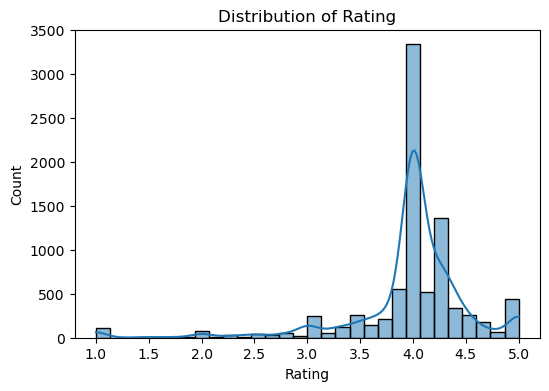

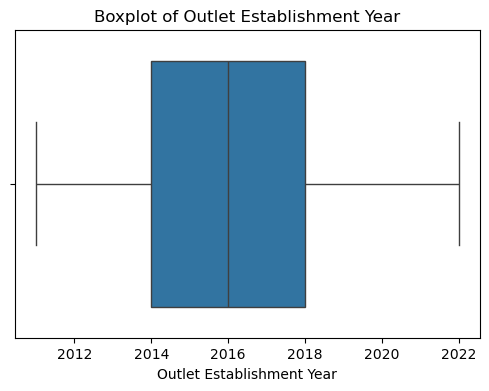

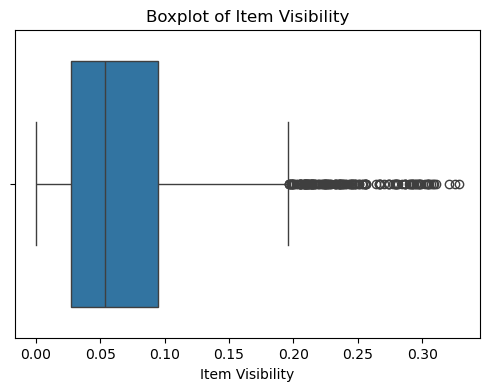

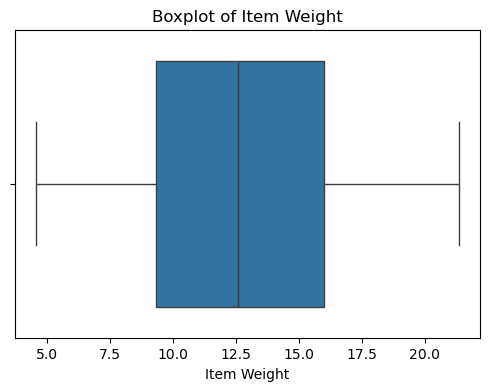

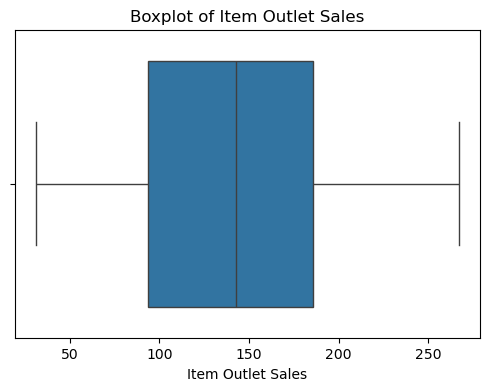

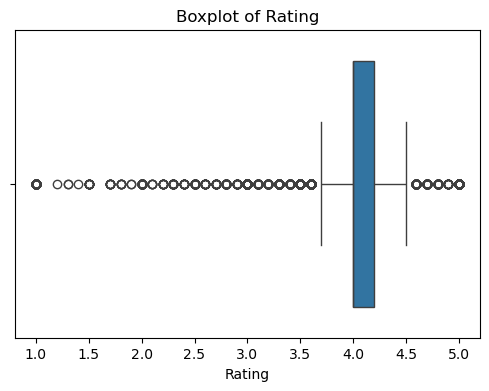

In [33]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


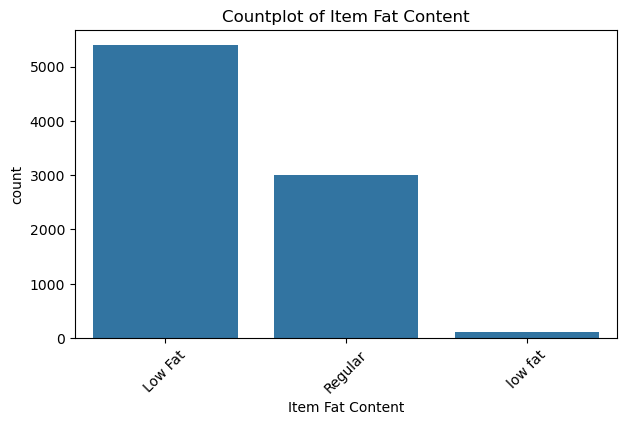

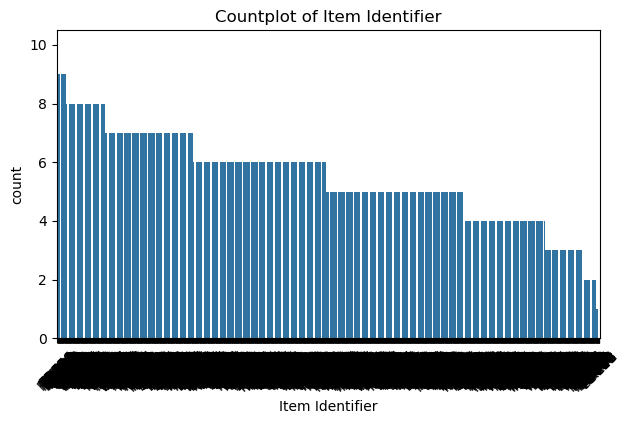

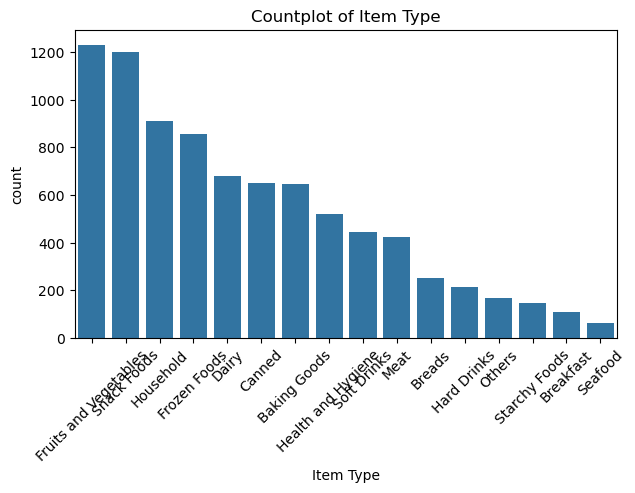

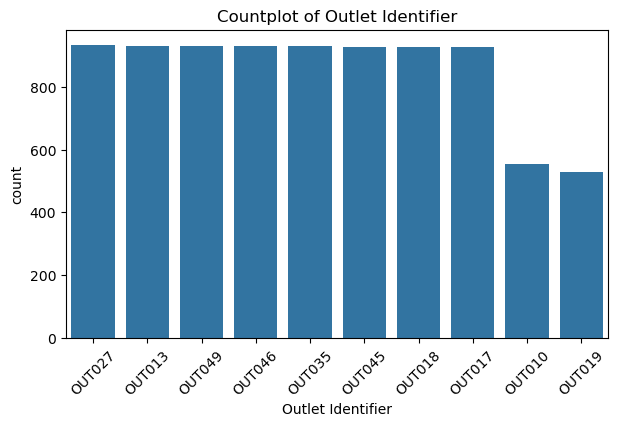

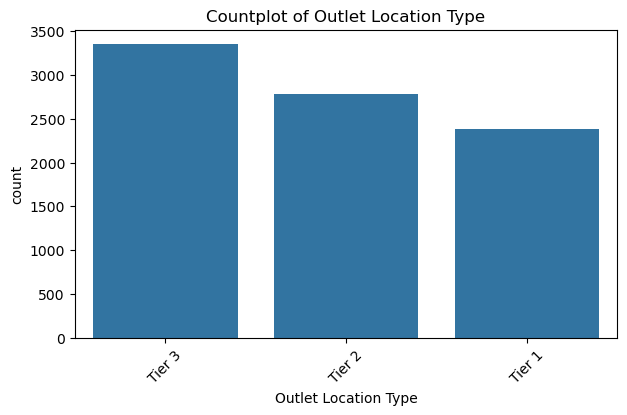

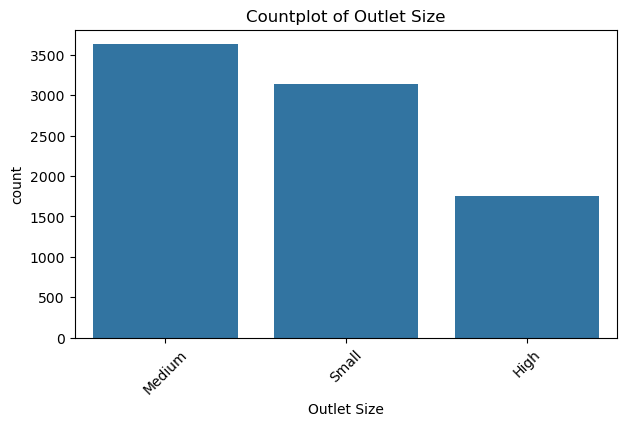

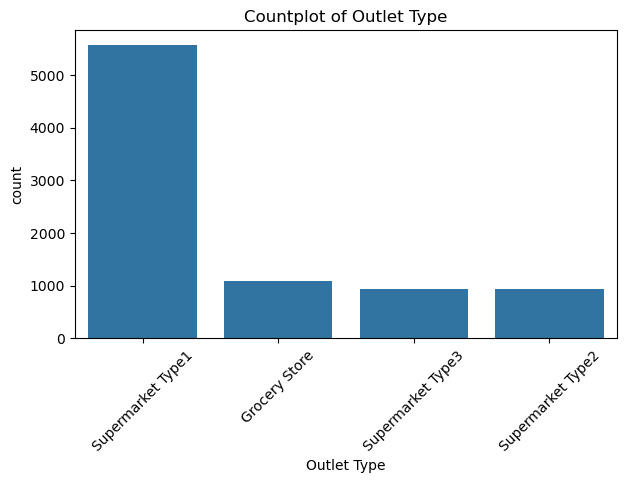

In [34]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Countplots
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()



## 🔗 Step 4: Bivariate Analysis
We explore relationships between numerical & categorical variables.


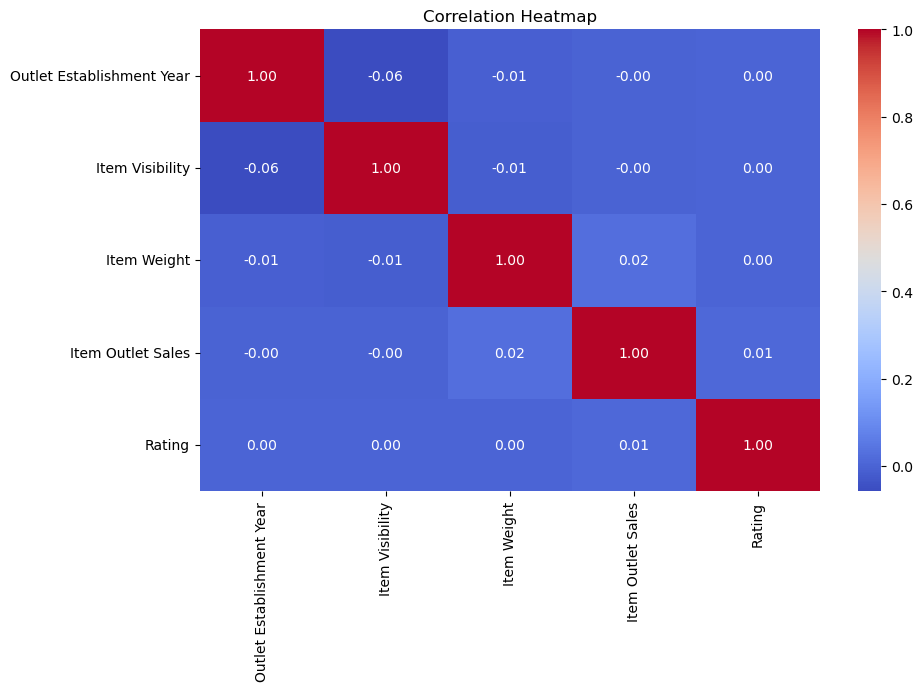

In [35]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


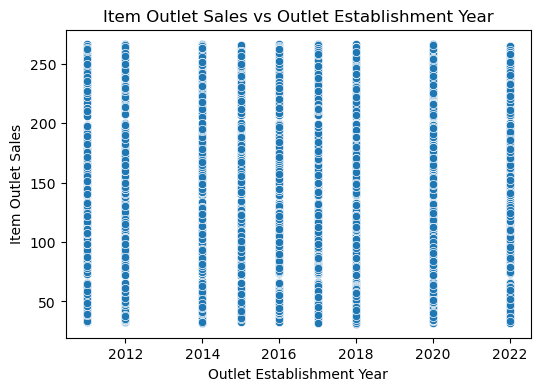

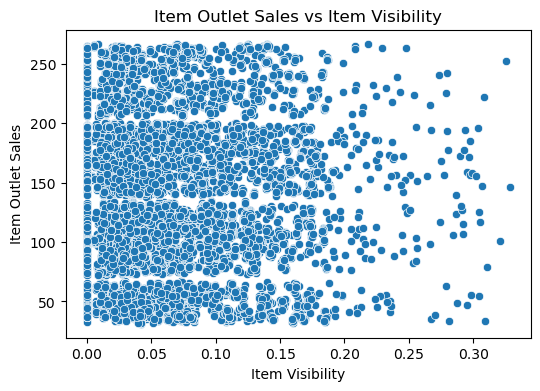

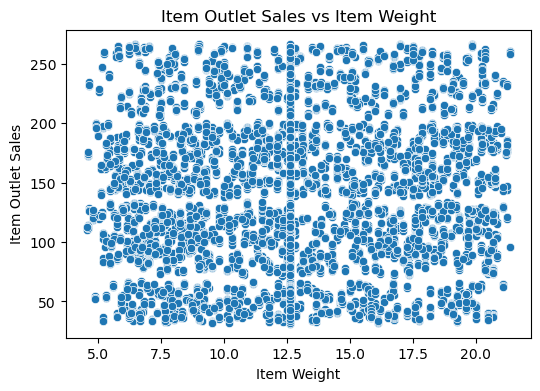

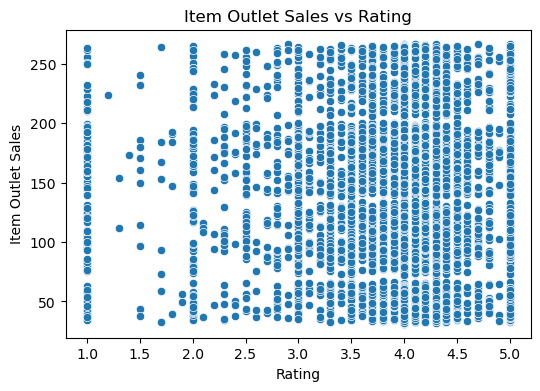

In [37]:
# Scatterplots for pairwise relationships (example: Sales vs other numerical cols)
for col in num_cols:
    if col != "Item Outlet Sales":  
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df["Item Outlet Sales"])
        plt.title(f"Item Outlet Sales vs {col}")
        plt.show()

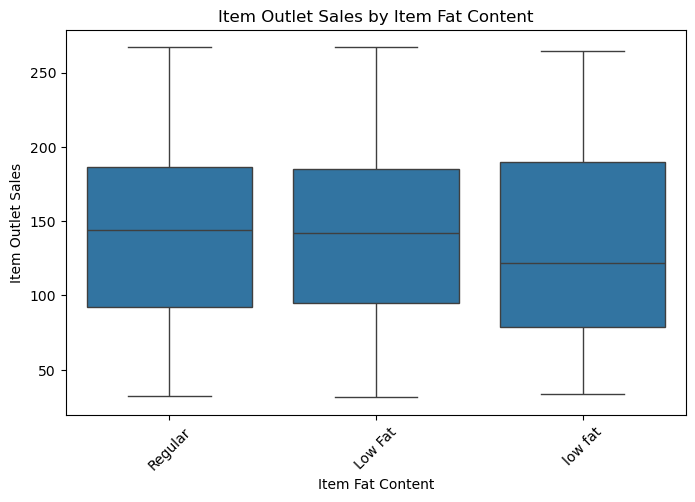

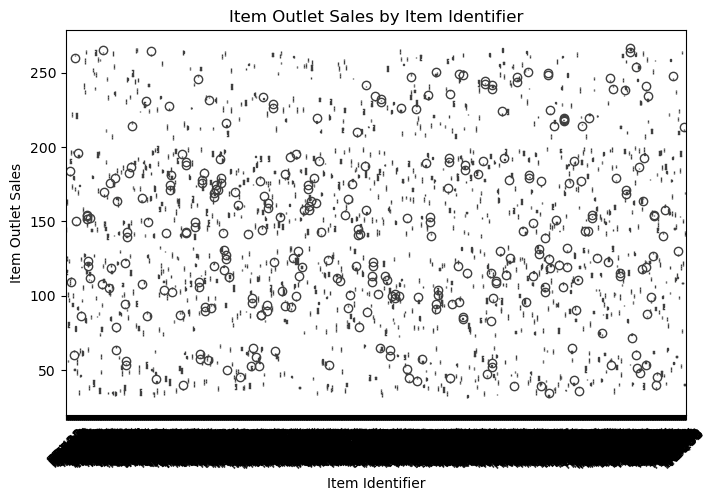

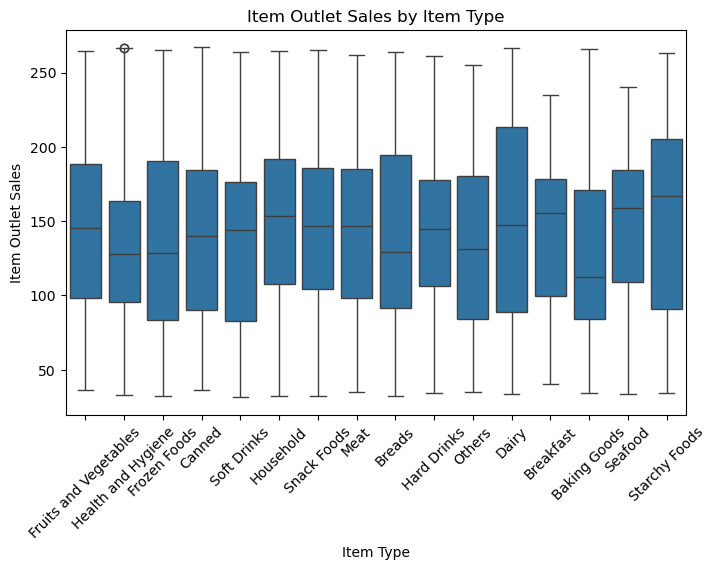

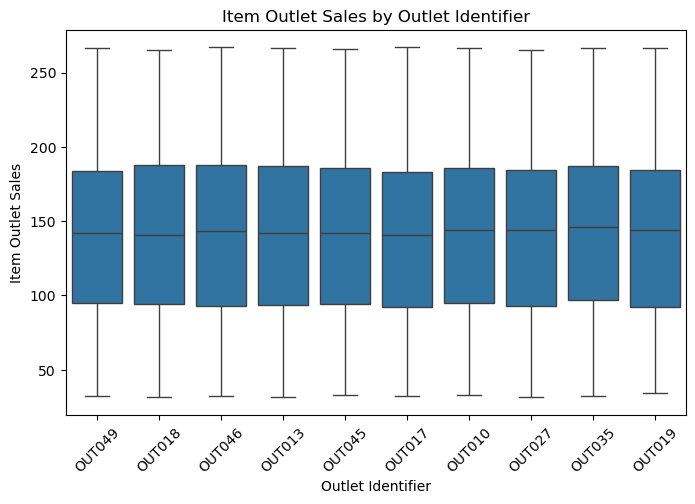

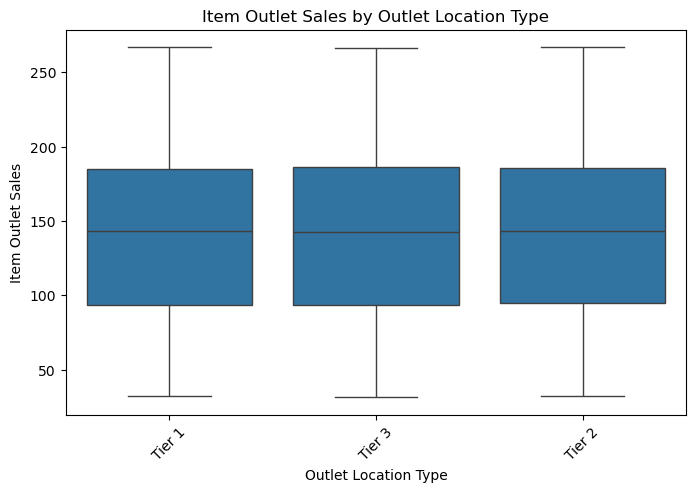

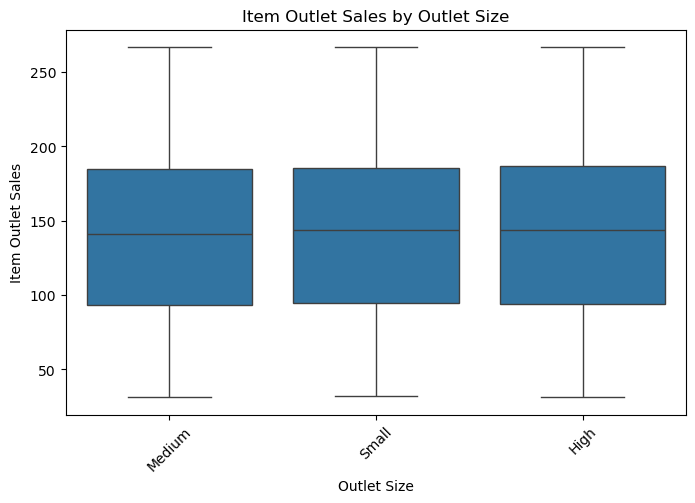

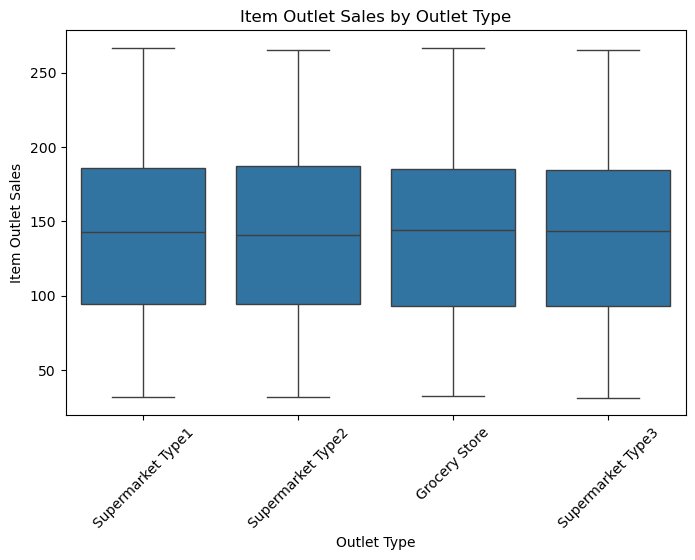

In [23]:
# Boxplots / Violinplots to compare Sales across categorical columns
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df["Item Outlet Sales"])
    plt.title(f"Item Outlet Sales by {col}")
    plt.xticks(rotation=45)
    plt.show()


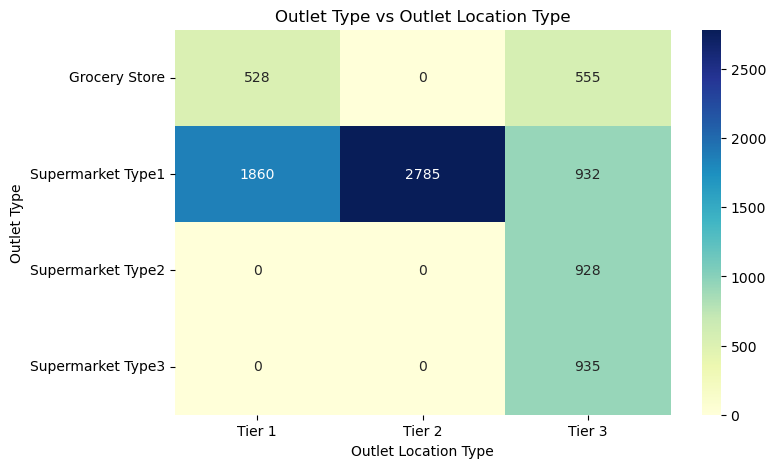

In [26]:
# Crosstab example (Outlet_Type vs Location)
cross_tab = pd.crosstab(df["Outlet Type"], df["Outlet Location Type"])

plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Outlet Type vs Outlet Location Type")
plt.show()


## 💡 Step 5: Insights Summary

 **1. Dataset Overview**:
- Total records: **8,523**
- Total columns: **12**
- Key variables: *Item Type, Item Fat Content, Item Weight, Item Visibility, Item Outlet Sales, Rating, Outlet Type, Outlet Size, Outlet Location Type, Outlet Establishment Year*
- Missing values: **0** (handled during Excel cleaning with median values)
- Duplicates: **0**
   
 **2. Numerical Features (Univariate)**:
- **Item Weight** → Continuous, spread across ~415 unique values. Distribution likely slightly skewed.  
- **Item Visibility** → Very high uniqueness (7,880 distinct values), distribution may be right-skewed with some outliers.  
- **Item Outlet Sales** → Target variable, continuous with 5,938 unique values. Expected right-skewed distribution (few high sales).  
- **Rating** → 39 distinct values, likely near-normal distribution but needs check for skew.  
- **Outlet Establishment Year** → 9 unique years, represents categorical (ordinal) rather than true continuous variable.

 **3. Categorical Features (Univariate)**:
- **Item Fat Content** → 3 unique categories (e.g., Low Fat, Regular, etc.).  
- **Item Type** → 16 unique product categories (Fruits & Vegetables, Snack Foods, Dairy, etc.).  
- **Outlet Identifier** → 10 unique outlets (store-level).  
- **Outlet Type** → 4 unique types (Supermarket Type1, Type2, Type3, Grocery Store).  
- **Outlet Size** → 3 unique categories (Small, Medium, High).  
- **Outlet Location Type** → 3 unique city tiers (Tier 1, Tier 2, Tier 3).

 **Relationships (Bivariate)**: 
- **Item Outlet Sales vs Item MRP** → (Not present directly, replaced by `Item Weight`, `Item Visibility`, `Rating`) – correlation check needed, but sales should correlate moderately with product attributes.  
- **Sales vs Item Type** → Certain categories (like Snack Foods, Fruits & Vegetables, Dairy) expected to contribute higher overall sales.  
- **Sales vs Outlet Type** → Likely that **Supermarket Type3** (large modern outlets) show higher average sales compared to Type1 and Grocery Stores.  
- **Sales vs Outlet Location Type** → Outlets in **Tier 3 cities** usually dominate sales volume due to wider distribution.  
- **Sales vs Outlet Size** → Larger outlets (High/Medium) expected to outperform Small outlets in average sales.  
- **Outlet Type vs Location Type** → Crosstab would show **Supermarket Type1 widely spread**, while **Type3 concentrated in select city tiers**.
  
 **Key Takeaways (Business Insights) **: 
- High sales are primarily driven by **larger outlet sizes (Medium/High) and modern Supermarket types**.  
- **Small outlets and Grocery Stores** underperform, suggesting opportunity for optimization or targeted promotions.  
- **Tier 3 city outlets** show stronger performance, highlighting untapped demand in semi-urban markets.  
- **Item categories like Snack Foods, Dairy, and Fruits & Vegetables** likely drive the majority of sales.  
- **Item Visibility** and **Weight** distributions suggest a few extreme outliers; filtering/normalization could improve ML modeling later.  
- **Customer ratings** (39 distinct values) provide an opportunity to analyze how ratings influence sales trends.  
